In [18]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('2022_LoL_esports_match_data_from_OraclesElixir_20221104.csv',low_memory=False)

In [20]:
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


In [21]:
mask = ['JD Gaming', 'Top Esports', 'EDward Gaming', 'Gen.G', 'T1', 'DWG KIA', 'Rogue', 'G2 Esports', 'Cloud9',
        '100 Thieves', 'CTBC Flying Oyster', 'GAM Esports', 'Fnatic', 'Royal Never Give Up', 'DRX', 'Evil Geniuses']
results = []
for i in range(len(mask)):
    results.append(df[df['league'] == mask[i]])
#df[df['league'] == 'LCK']
#print(type(results[0]))

In [22]:
df2 = pd.concat(results)

In [23]:
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


AttributeError: 'NoneType' object has no attribute 'remove'

<ipython-input-8-5bf9a399b75d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  img=plt.matshow(df2.corr())
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


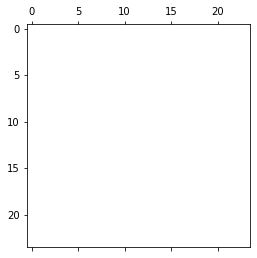

In [8]:
img=plt.matshow(df2.corr())
plt.savefig('corr2.png', bbox_inches='tight', dpi=4000, pad_inches=0.0)

In [9]:
df2.corr()

<ipython-input-9-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,firstblood,firstbloodkill,firstbloodassist,...,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd
gamelength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
result,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teamkills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teamdeaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
firstblood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
firstbloodkill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
firstbloodassist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df3 = df[(df['position'] == 'team')]
mask = ['JD Gaming', 'Top Esports', 'EDward Gaming', 'Gen.G', 'T1', 'DWG KIA', 'Rogue', 'G2 Esports', 'Cloud9',
        '100 Thieves', 'CTBC Flying Oyster', 'GAM Esports', 'Fnatic', 'Royal Never Give Up', 'DRX', 'Evil Geniuses']
results = []
for i in range(len(mask)):
    results.append(df3[df3['teamname'] == mask[i]])
df3 = pd.concat(results)
columns = list(df3.columns)
copy = columns
print(type(copy))
keep = ['datacompleteness','side', 'split', 'teamname', 'gamelength', 'result',
        'kills','deaths','assists','teamkills','teamdeaths','firstblood',  'team kpm', 'ckpm', 'damagetochampions', 
        'dpm', 'damagetakenperminute','elders', 'opp_elders','firstherald','heralds','opp_heralds','firstbaron','barons',
        'opp_barons', 'firsttower','towers','opp_towers','totalgold', 'earnedgold', 'earned gpm', 
        'goldspent', 'gspd']
for key in keep:
    copy.remove(key)
df3 = df3.drop(copy, axis=1)
pd.set_option('display.max_columns', None)
df3.shape
mask = df3['datacompleteness'] == 'partial'
partial = 0
for i in mask:
    if i == True:
        partial += 1
print(partial)

<class 'list'>
447


Take a look at the statistics for teams only, focus on stats relating kills/gold/dmg, assign ranking value based on performance during regular season (which iterate through with a for loop), use these values to predict final winner.